<a href="https://colab.research.google.com/github/xphoenixx32/case_study/blob/main/rfm_clustering_project_for_clv_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prepare**

In [2]:
# !pip install itables
# !pip install pmdarima
# !pip install -U kaleido
# !pip install ace_tools
# !pip install tensorflow
# !pip install scipy
# !pip install keras
# !pip install supertree
# !pip install skimpy
# !pip install shap
# !pip install ptitprince

### **Import Packages**

In [3]:
# basic
import os
from datetime import timedelta
import pandas as pd
import numpy as np
import random
from datetime import datetime
import pytz
# from skimpy import skim

# ploting
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.dates import DateFormatter
import matplotlib.cm as cm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from IPython.display import Image
from supertree import SuperTree
from sklearn.tree import export_graphviz
# from keras.utils.vis_utils import plot_model
import ptitprince as pt

# statistics
from scipy.stats import skew, kurtosis, ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import shap

# modeling
# import pmdarima as pm
import keras
from keras.saving import save_model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ParameterGrid, KFold
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, make_scorer, silhouette_score, silhouette_samples
from sklearn.inspection import PartialDependenceDisplay
# import ace_tools as tools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.utils import plot_model

# others
from tqdm import tqdm
from IPython.core.interactiveshell import InteractiveShell
# from itables import init_notebook_mode
# init_notebook_mode(all_interactive = True)
import warnings
warnings.filterwarnings('ignore')

In [4]:
print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)

Keras version: 3.5.0
TensorFlow version: 2.17.1


### **Mount to Drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load Dataset**

In [7]:
df = pd.read_csv('/content/drive/MyDrive/01 file_share_to_google_colab/shopee_clv_nd/rfm_clustering_project_latest_version_20241216.csv')

### **Intructions of Dataset**

##### TBC

### **Pre-processing Data**

In [8]:
df.groupby(['is_login_on_dec', 'is_puchased_on_dec', 'purchase_more_than_one_on_dec'])['userid'].nunique().to_frame('user_count')

user_count
is_login_on_dec is_puchased_on_dec purchase_more_than_one_on_dec            
0               0                  0                                     971
                1                  1                                       1
1               0                  0                                   26033
                1                  0                                   16464
                                   1                                   56531

In [9]:
df.columns

Index(['userid', 'is_login_on_dec', 'is_puchased_on_dec',
       'purchase_more_than_one_on_dec', 'r_least_days_since_last_login',
       'r_most_days_since_last_login', 'r_least_days_since_last_placing',
       'r_most_days_since_last_placing', 'r_days_since_last_coins_checkin',
       'r_days_since_last_game_played', 'r_days_since_last_ls_viewed',
       'f_m2_login_days_ttl', 'f_m2_login_days_1st_spike',
       'f_m2_login_days_2nd_spike', 'f_m2_login_days_mall_spike',
       'f_m2_login_days_mini_spike', 'f_m2_login_days_bau',
       'f_m2_login_days_fss', 'f_m2_login_days_mini_fss',
       'f_m1_login_days_ttl', 'f_m1_login_days_1st_spike',
       'f_m1_login_days_2nd_spike', 'f_m1_login_days_mall_spike',
       'f_m1_login_days_mini_spike', 'f_m1_login_days_bau',
       'f_m1_login_days_fss', 'f_m1_login_days_mini_fss',
       'f_m2_purchase_days_ttl', 'f_m2_purchase_days_1st_spike',
       'f_m2_purchase_days_2nd_spike', 'f_m2_purchase_days_mall_spike',
       'f_m2_purchase_day

In [10]:
df.head()

userid  is_login_on_dec  is_puchased_on_dec  \
0  268180194                1                   1   
1  413454562                1                   1   
2    6568126                1                   0   
3  101379315                1                   1   
4   24715686                1                   0   

   purchase_more_than_one_on_dec  r_least_days_since_last_login  \
0                              0                              1   
1                              0                              1   
2                              0                              1   
3                              1                              1   
4                              0                              1   

   r_most_days_since_last_login  r_least_days_since_last_placing  \
0                             6                                1   
1                             2                                1   
2                            27                               34   
3                             3                                1   
4                             6                                1   

   r_most_days_since_last_placing  r_days_since_last_coins_checkin  \
0                              64                               30   
1                              22                               16   
2                              94                               26   
3                              19                               17   
4                              41                               76   

   r_days_since_last_game_played  ...  lg_days_scs_purchase  \
0                             53  ...                     0   
1                             16  ...                     0   
2                             26  ...                     0   
3                             17  ...                     0   
4                             76  ...                     0   

   lg_days_cvs_purchase  lg_days_hd_purchase  pi_days_pv_ccb_used  \
0                     1                    2                    0   
1                     0                    0                    0   
2                     0                    0                    0   
3                     2                    0                    4   
4                     1                    1                    0   

   pi_days_pv_dv_used  pi_days_sv_ccb_used  pi_days_sv_dv_used  \
0                   0                    0                   3   
1                   0                    0                   1   
2                   0                    0                   0   
3                   0                    1                   4   
4                   0                    0                   2   

   pi_days_plus_used  pi_days_nes_fss_used  pi_days_fsv_used  
0                  0                     4                 0  
1                  0                     3                 0  
2                  0                     0                 0  
3                  0                     6                 3  
4                  0                     1                 0  

[5 rows x 67 columns]

## RFM Clustering

In [11]:
# sampled_df = df.sample(n = 1_024)
# sampled_df.to_csv('/content/drive/MyDrive/01 file_share_to_google_colab/shopee_clv_nd/export_df.csv',  index = False)

In [12]:
sample_df = df.sample(n = 3_000).reset_index(drop = True)

rfm_columns = [col for col in sample_df.columns if col.startswith(('r_', 'f_', 'm_'))]

# Normalize the data for K-means clustering
scaler = StandardScaler()
rfm_scaled = sample_df[rfm_columns].copy()
rfm_scaled[rfm_columns] = scaler.fit_transform(rfm_scaled[rfm_columns])
rfm_scaled

r_least_days_since_last_login  r_most_days_since_last_login  \
0                               0.0                     -0.482146   
1                               0.0                     -0.676873   
2                               0.0                     -0.287418   
3                               0.0                     -0.676873   
4                               0.0                     -0.092690   
...                             ...                           ...   
2995                            0.0                     -0.676873   
2996                            0.0                     -0.092690   
2997                            0.0                     -0.676873   
2998                            0.0                      0.296765   
2999                            0.0                     -0.482146   

      r_least_days_since_last_placing  r_most_days_since_last_placing  \
0                           -0.081422                       -0.389224   
1                           -0.081422                       -0.192512   
2                           -0.081422                       -0.271197   
3                           -0.081422                       -0.231854   
4                           -0.081422                       -0.297425   
...                               ...                             ...   
2995                        -0.081422                       -0.048256   
2996                        -0.081422                       -0.258082   
2997                        -0.081422                       -0.402338   
2998                        -0.081422                       -0.192512   
2999                        -0.081422                       -0.323653   

      r_days_since_last_coins_checkin  r_days_since_last_game_played  \
0                            0.119695                       0.280248   
1                           -0.653363                      -0.661235   
2                           -0.653363                      -0.081861   
3                           -0.653363                      -0.661235   
4                           -0.395677                      -0.371548   
...                               ...                            ...   
2995                        -0.653363                      -0.661235   
2996                         0.248538                       0.352670   
2997                        -0.653363                      -0.588814   
2998                         0.248538                       0.352670   
2999                        -0.653363                      -0.661235   

      r_days_since_last_ls_viewed  f_m2_login_days_ttl  \
0                       -0.979638             0.517447   
1                       -0.913724             0.789549   
2                        0.009074            -0.026757   
3                        0.338645             0.789549   
4                        0.338645             0.109294   
...                           ...                  ...   
2995                    -0.056840             0.789549   
2996                     1.063701             0.245345   
2997                    -0.781896             0.789549   
2998                    -0.056840             0.109294   
2999                    -0.650067             0.653498   

      f_m2_login_days_1st_spike  f_m2_login_days_2nd_spike  ...  \
0                       0.41292                   0.455773  ...   
1                       0.41292                   0.455773  ...   
2                       0.41292                  -2.194072  ...   
3                       0.41292                   0.455773  ...   
4                       0.41292                   0.455773  ...   
...                         ...                        ...  ...   
2995                    0.41292                   0.455773  ...   
2996                    0.41292                   0.455773  ...   
2997                    0.41292                   0.455773  ...   
2998                    0.41292                   0.455773  ...   
2

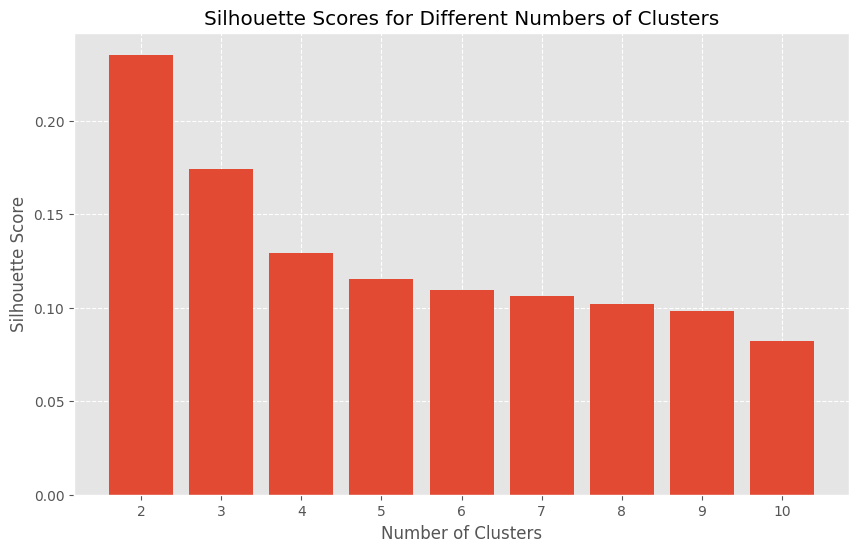

In [13]:
silhouette_scores = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
    kmeans.fit(rfm_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(rfm_scaled, labels))

# Plot silhouette scores
plt.figure(figsize = (10, 6))
plt.bar(cluster_range, silhouette_scores, tick_label = cluster_range)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.grid(True, linestyle = '--')
plt.show()

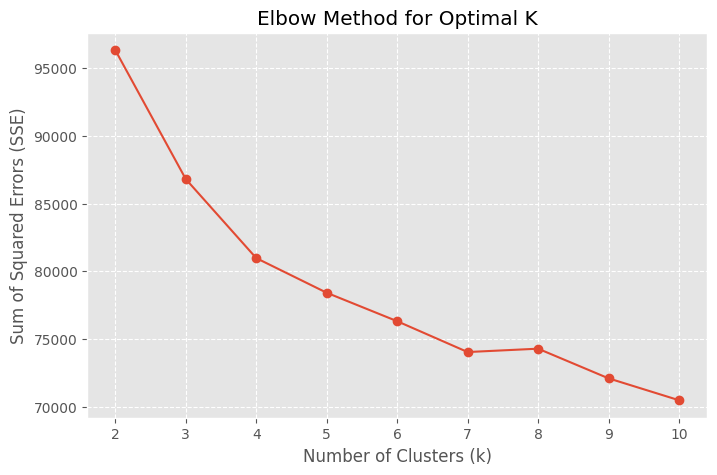

In [14]:
# Step 1: Elbow Method to determine optimal clusters
sse = []
k_range = range(2, 11)  # Test clusters from 2 to 10
for k in k_range:
    kmeans = KMeans(
        n_clusters = k,
        random_state = 42,
        )
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plotting Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True, linestyle='--')
plt.show()

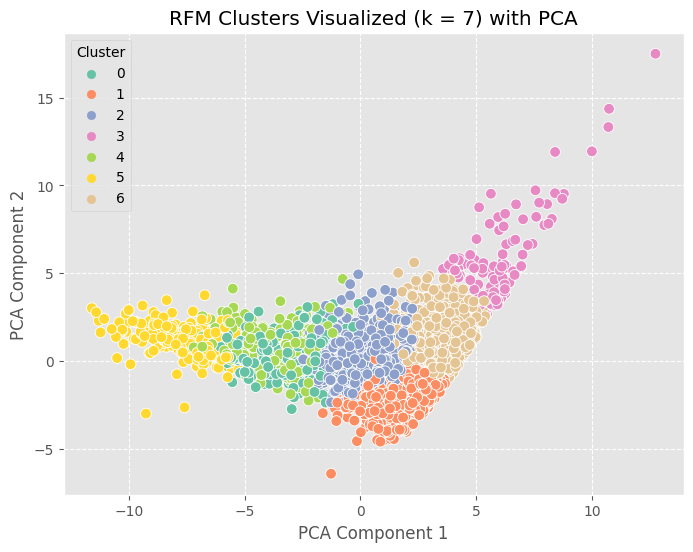

In [15]:
# Step 3: Visualizing clusters using PCA
# Fitting K-means with optimal k (choosing k=4 as an example for now)
optimal_k = 7
kmeans = KMeans(
    n_clusters = optimal_k,
    random_state = 42,
    )
rfm_labels = kmeans.fit_predict(rfm_scaled)

# PCA for visualization
pca = PCA(n_components = 2)
rfm_pca = pca.fit_transform(rfm_scaled)

plt.figure(figsize = (8, 6))
sns.scatterplot(
    x = rfm_pca[:, 0],
    y = rfm_pca[:, 1],
    hue = rfm_labels,
    palette = 'Set2',
    s = 60,
    )
plt.title(f'RFM Clusters Visualized (k = {optimal_k}) with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title = 'Cluster')
plt.grid(True, linestyle='--')
plt.show()

In [16]:
# Step 4: Summary statistics and violin plots for RFM features
sample_df['cluster'] = rfm_labels
sample_df

userid  is_login_on_dec  is_puchased_on_dec  \
0     481579663                1                   1   
1     311427351                1                   0   
2       5815067                1                   1   
3       8182067                1                   1   
4     130139445                1                   1   
...         ...              ...                 ...   
2995  255606444                1                   1   
2996   50865830                1                   1   
2997   27474949                1                   1   
2998   26781996                1                   0   
2999  137027020                1                   1   

      purchase_more_than_one_on_dec  r_least_days_since_last_login  \
0                                 1                              1   
1                                 0                              1   
2                                 1                              1   
3                                 0                              1   
4                                 1                              1   
...                             ...                            ...   
2995                              1                              1   
2996                              1                              1   
2997                              1                              1   
2998                              0                              1   
2999                              1                              1   

      r_most_days_since_last_login  r_least_days_since_last_placing  \
0                                2                                1   
1                                1                                1   
2                                3                                1   
3                                1                                1   
4                                4                                1   
...                            ...                              ...   
2995                             1                                1   
2996                             4                                1   
2997                             1                                1   
2998                             6                                1   
2999                             2                                1   

      r_most_days_since_last_placing  r_days_since_last_coins_checkin  \
0                                 10                               28   
1                                 25                               16   
2                                 19                               16   
3                                 22                               16   
4                                 17                               20   
...                              ...                              ...   
2995                              36                               16   
2996                              20                               30   
2997                               9                               16   
2998                              25                               30   
2999                              15                               16   

      r_days_since_last_game_played  ...  lg_days_cvs_purchase  \
0                                29  ...                     1   
1                                16  ...                     2   
2                                24  ...                     0   
3                                16  ...                     2   
4                                20  ...                     0   
...                             ...  ...                   ...   
2995                             16  ...                     0   
2996                             30  ...                     5   
2997                             17  ...                     7   
2998                             30  ...                     0   
2999                             16  ..

In [17]:
rfm_scaled.columns

Index(['r_least_days_since_last_login', 'r_most_days_since_last_login',
       'r_least_days_since_last_placing', 'r_most_days_since_last_placing',
       'r_days_since_last_coins_checkin', 'r_days_since_last_game_played',
       'r_days_since_last_ls_viewed', 'f_m2_login_days_ttl',
       'f_m2_login_days_1st_spike', 'f_m2_login_days_2nd_spike',
       'f_m2_login_days_mall_spike', 'f_m2_login_days_mini_spike',
       'f_m2_login_days_bau', 'f_m2_login_days_fss',
       'f_m2_login_days_mini_fss', 'f_m1_login_days_ttl',
       'f_m1_login_days_1st_spike', 'f_m1_login_days_2nd_spike',
       'f_m1_login_days_mall_spike', 'f_m1_login_days_mini_spike',
       'f_m1_login_days_bau', 'f_m1_login_days_fss',
       'f_m1_login_days_mini_fss', 'f_m2_purchase_days_ttl',
       'f_m2_purchase_days_1st_spike', 'f_m2_purchase_days_2nd_spike',
       'f_m2_purchase_days_mall_spike', 'f_m2_purchase_days_mini_spike',
       'f_m2_purchase_days_bau', 'f_m2_purchase_days_fss',
       'f_m2_purchase_da

##### *Cluster Plot*

In [18]:
def remove_outliers(df, column, groupby_col):
    def filter_group(group):
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]
    return df.groupby(groupby_col, group_keys=False).apply(filter_group)

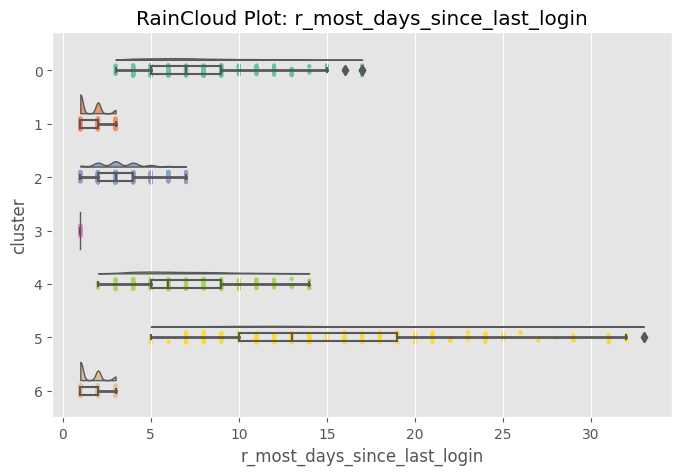

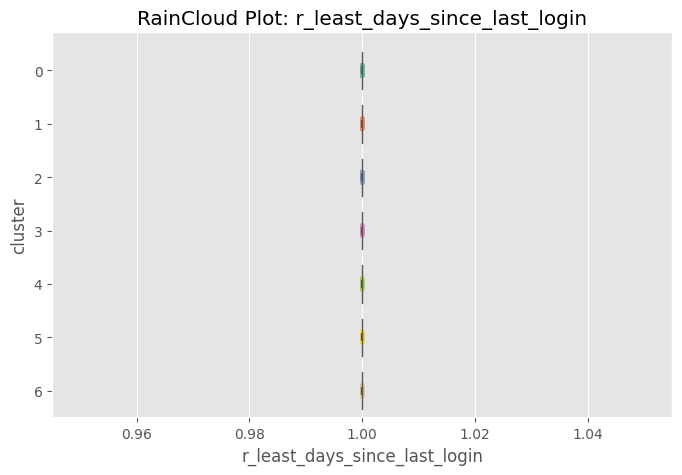

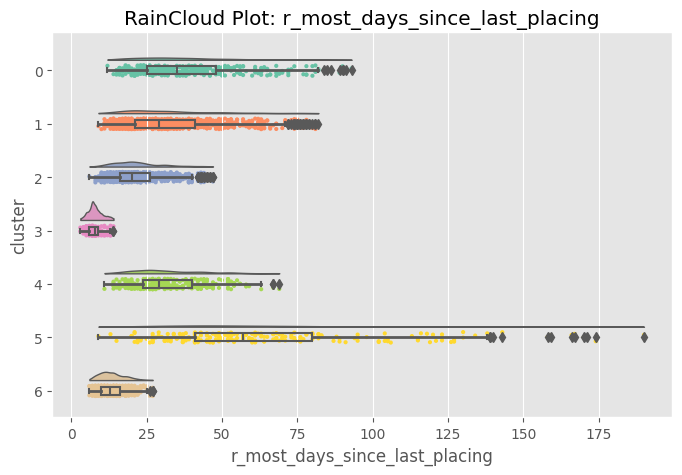

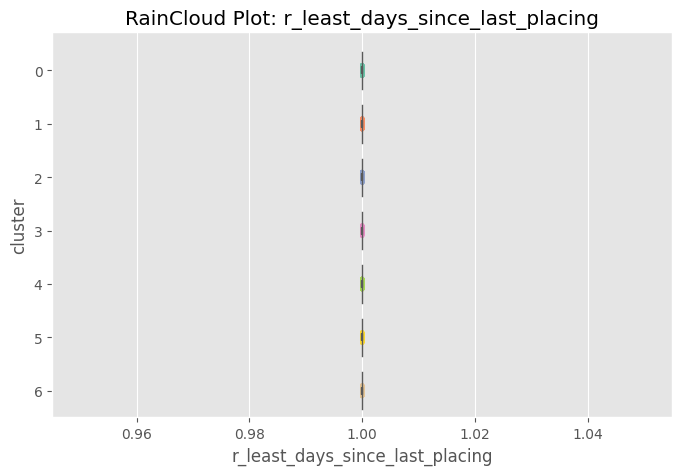

In [19]:
plot_columns  = [
    'r_most_days_since_last_login', 'r_least_days_since_last_login', 'r_most_days_since_last_placing', 'r_least_days_since_last_placing'
]

for col in plot_columns:
    filtered_data = remove_outliers(sample_df, col, 'cluster')
    plt.figure(figsize = (8, 5))
    pt.RainCloud(
        data = filtered_data,
        x='cluster',
        y = col,
        orient = 'h',
        # palette = 'coolwarm'
    )
    plt.title(f'RainCloud Plot: {col}')
    plt.show()

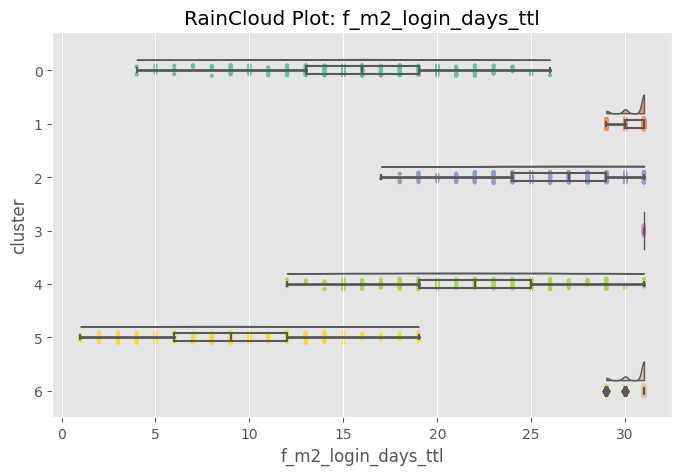

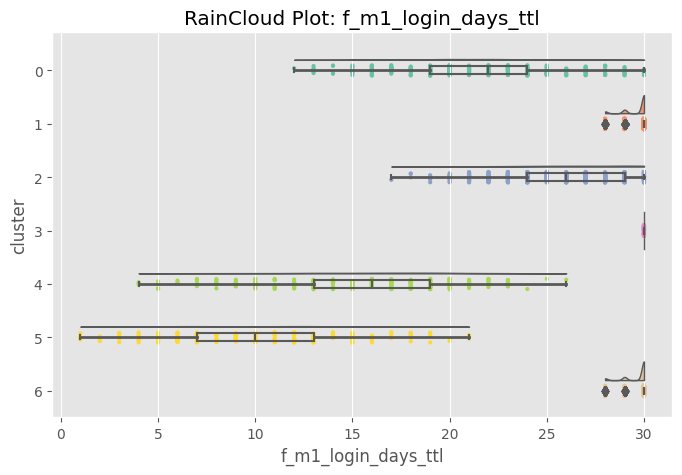

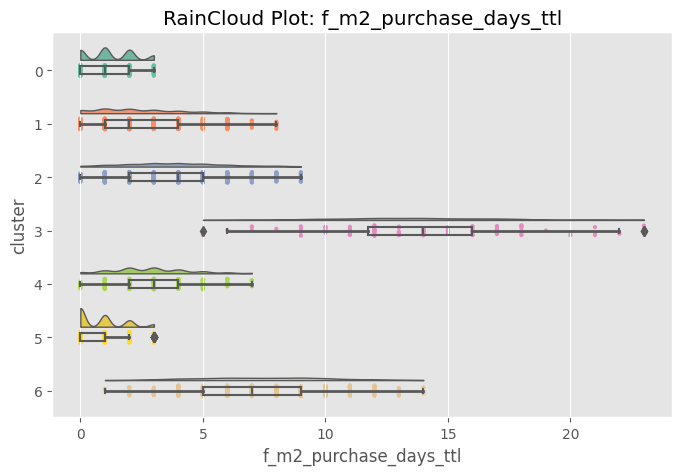

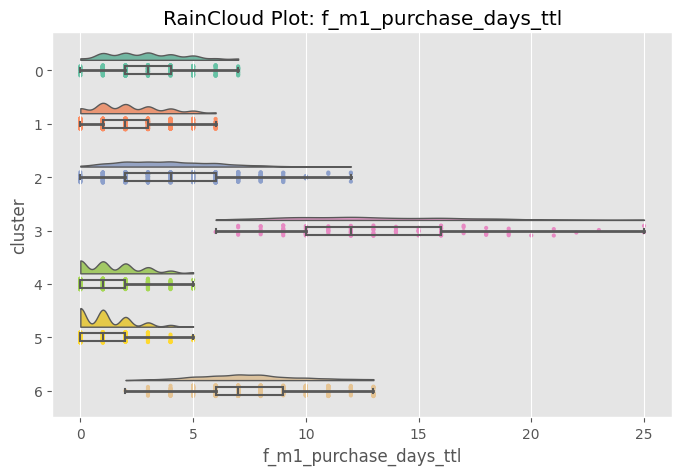

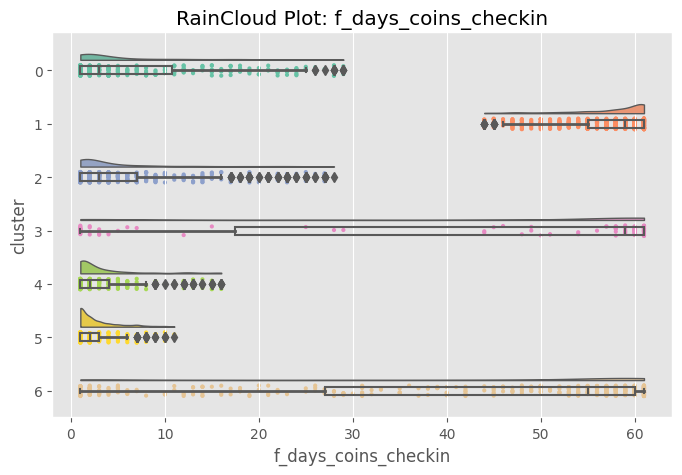

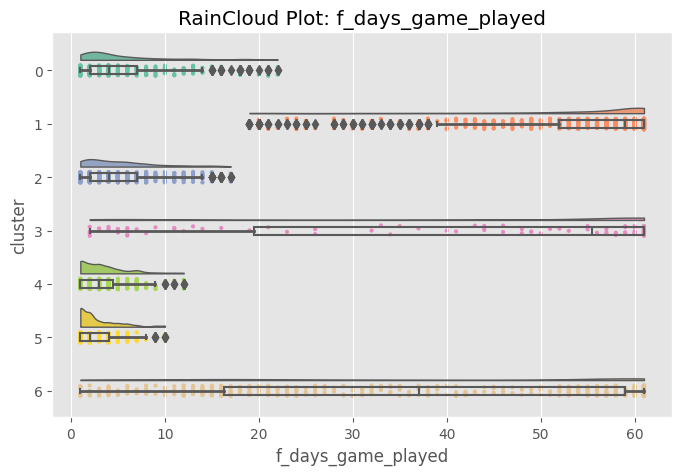

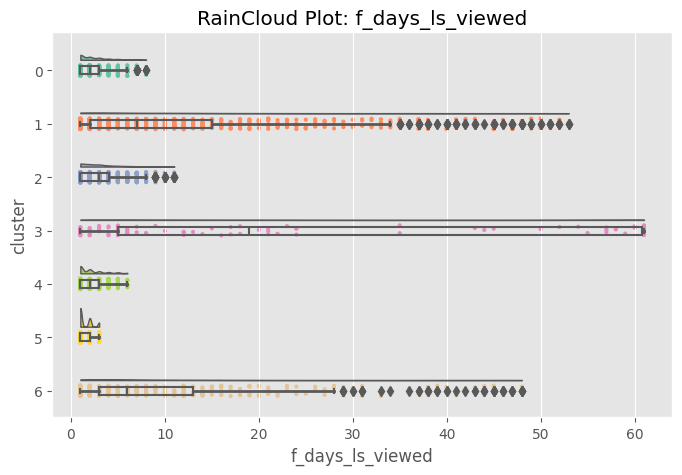

In [20]:
plot_columns  = [
    'f_m2_login_days_ttl', 'f_m1_login_days_ttl', 'f_m2_purchase_days_ttl', 'f_m1_purchase_days_ttl', 'f_days_coins_checkin', 'f_days_game_played', 'f_days_ls_viewed'
]

for col in plot_columns:
    filtered_data = remove_outliers(sample_df, col, 'cluster')
    plt.figure(figsize = (8, 5))
    pt.RainCloud(
        data = filtered_data,
        x = 'cluster',
        y = col,
        orient = 'h',
        # palette = 'coolwarm'
    )
    plt.title(f'RainCloud Plot: {col}')
    plt.show()

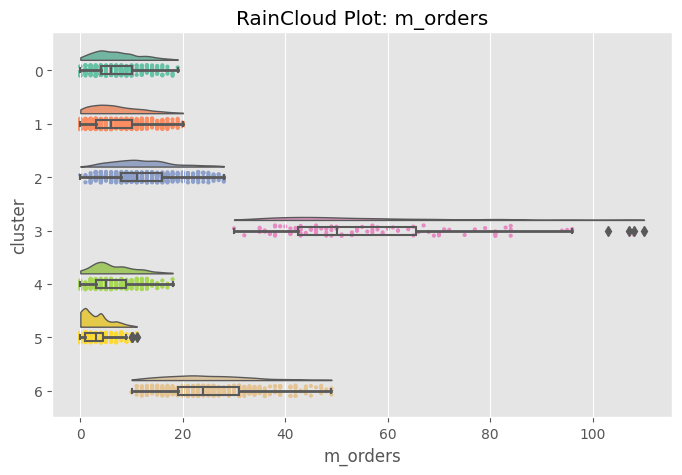

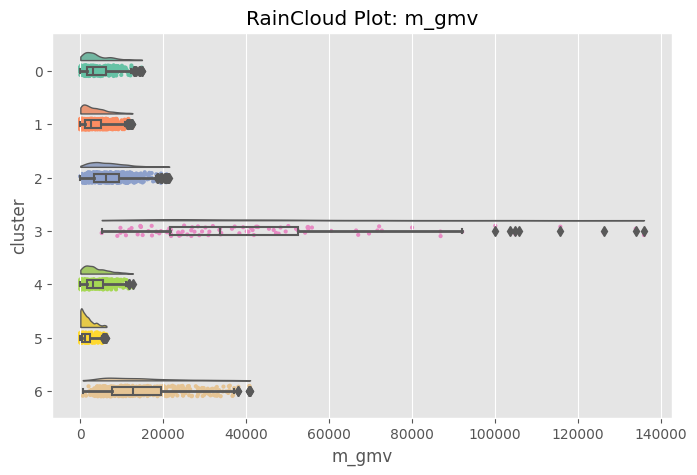

In [21]:
plot_columns  = [
    'm_orders', 'm_gmv'
]

for col in plot_columns:
    filtered_data = remove_outliers(sample_df, col, 'cluster')
    plt.figure(figsize = (8, 5))
    pt.RainCloud(
        data = filtered_data,
        x = 'cluster',
        y = col,
        orient = 'h',
        # palette = 'coolwarm'
    )
    plt.title(f'RainCloud Plot: {col}')
    plt.show()

## Classification Model

### *Data Preparation*

In [26]:
df['login_on_dec_str'] = df['is_login_on_dec'].map({1: 'Yes', 0: 'No'})

yes_df = df[df['login_on_dec_str'] == 'Yes']
no_df = df[df['login_on_dec_str'] == 'No']

n_samples = min(len(yes_df), len(no_df), 1_500)

# Sample equally from both groups
sample_yes = yes_df.sample(n = n_samples, random_state = 42)
sample_no = no_df.sample(n = n_samples, random_state = 42)

# Combine and shuffle the data
sample_df = pd.concat([sample_yes, sample_no]).sample(frac = 1, random_state = 42).reset_index(drop = True)

# Verify the balance of is_login_on_dec in the sampled data
sample_df['login_on_dec_str'].value_counts()

login_on_dec_str
No     972
Yes    972
Name: count, dtype: int64

In [28]:
df['login_on_dec_str'].value_counts()

login_on_dec_str
Yes    99028
No       972
Name: count, dtype: int64

In [30]:
%%time

# sample_df = df.sample(n = 3_000).reset_index(drop = True)

# Exclude 'userid', 'is_puchased_on_dec', and 'purchase_more_than_one_on_dec'
excluded_columns = ['userid', 'is_login_on_dec', 'is_puchased_on_dec', 'purchase_more_than_one_on_dec']
X = sample_df.drop(columns = excluded_columns + ['login_on_dec_str'])
y = sample_df['login_on_dec_str']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y,
                                                    )

CPU times: user 15.1 ms, sys: 958 µs, total: 16 ms
Wall time: 31.5 ms


### *Hyperparameter Tuning*

In [31]:
%%time

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state = 42)
grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    )
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

CPU times: user 5.56 s, sys: 907 ms, total: 6.47 s
Wall time: 5min 27s


In [36]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


### *Model Evaluation*

In [33]:
%%time

y_pred = best_rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.93      0.89       195
         Yes       0.92      0.84      0.88       194

    accuracy                           0.88       389
   macro avg       0.89      0.88      0.88       389
weighted avg       0.89      0.88      0.88       389

CPU times: user 53.9 ms, sys: 0 ns, total: 53.9 ms
Wall time: 59.6 ms


### *XAI: SHAP*

In [57]:
%%time

explainer = shap.TreeExplainer(best_rf)

# 計算 SHAP 值
shap_values = explainer.shap_values(X_train)

# 檢查輸出格式
if isinstance(shap_values, list):
    print(f"SHAP values for each class: {[s.shape for s in shap_values]}")
else:
    print(f"SHAP values shape: {shap_values.shape}")

print(f"X_train shape: {X_train.shape}")
print(f"y_train unique values: {set(y_train)}")

SHAP values shape: (1555, 63, 2)


##### *Summary Plot*

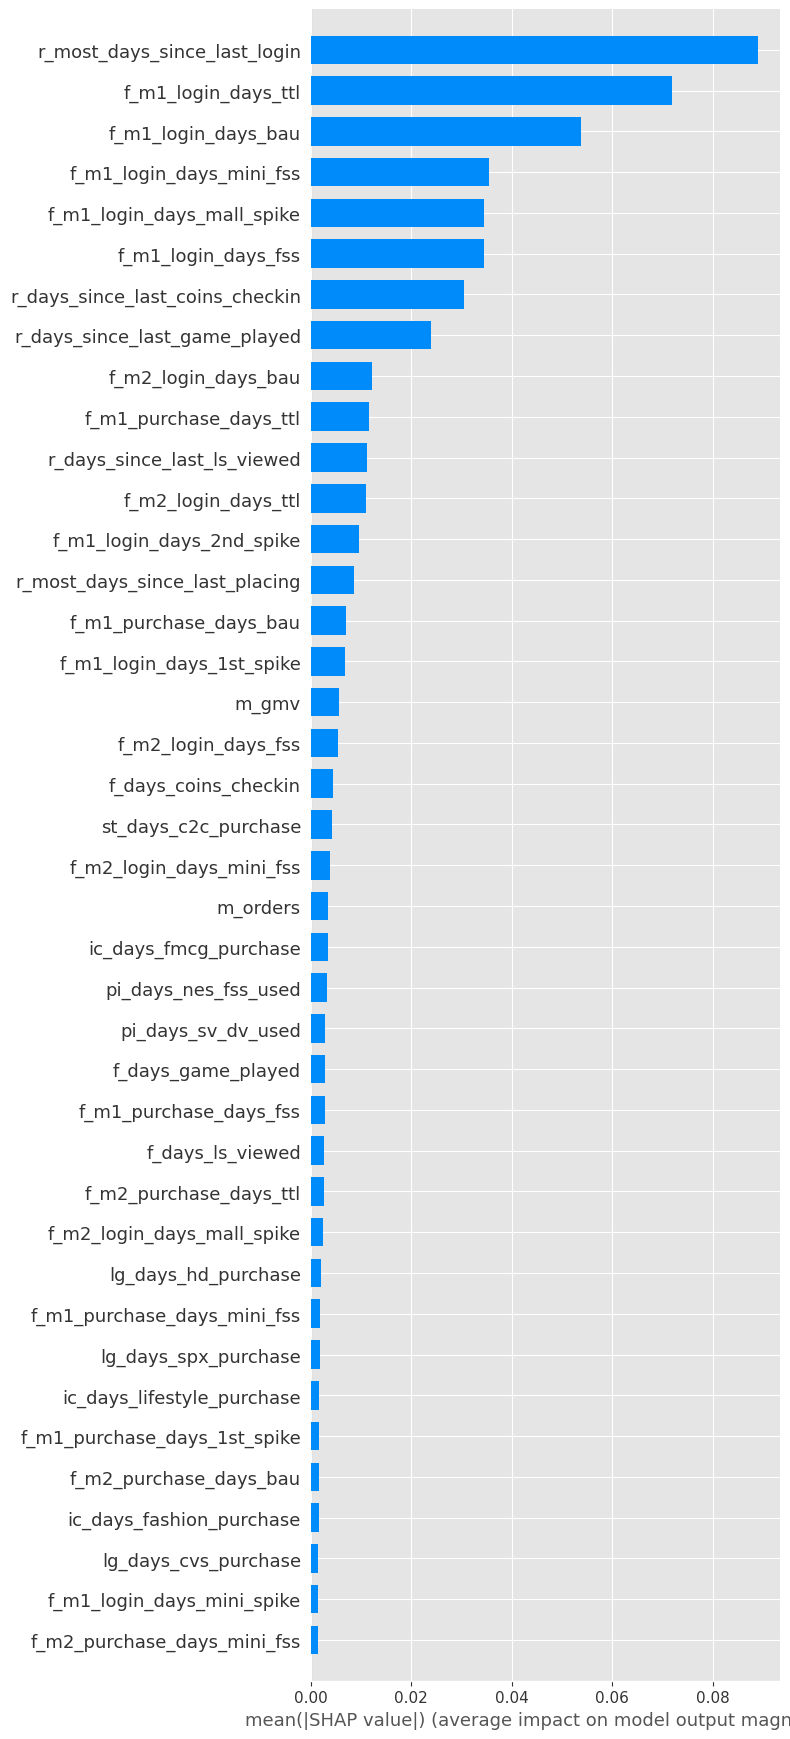

In [55]:
# 選取類別 'Yes' 的 SHAP 值 (第 3 個軸的索引 1)
shap_values_yes = shap_values[:, :, 1]

# 繪製 SHAP 條形圖
shap.summary_plot(
    shap_values_yes,       # 類別 'Yes' 的 SHAP 值
    X_train,               # 特徵數據
    plot_type = "bar",       # 條形圖
    feature_names=X_train.columns.tolist(),
    max_display = 40
)

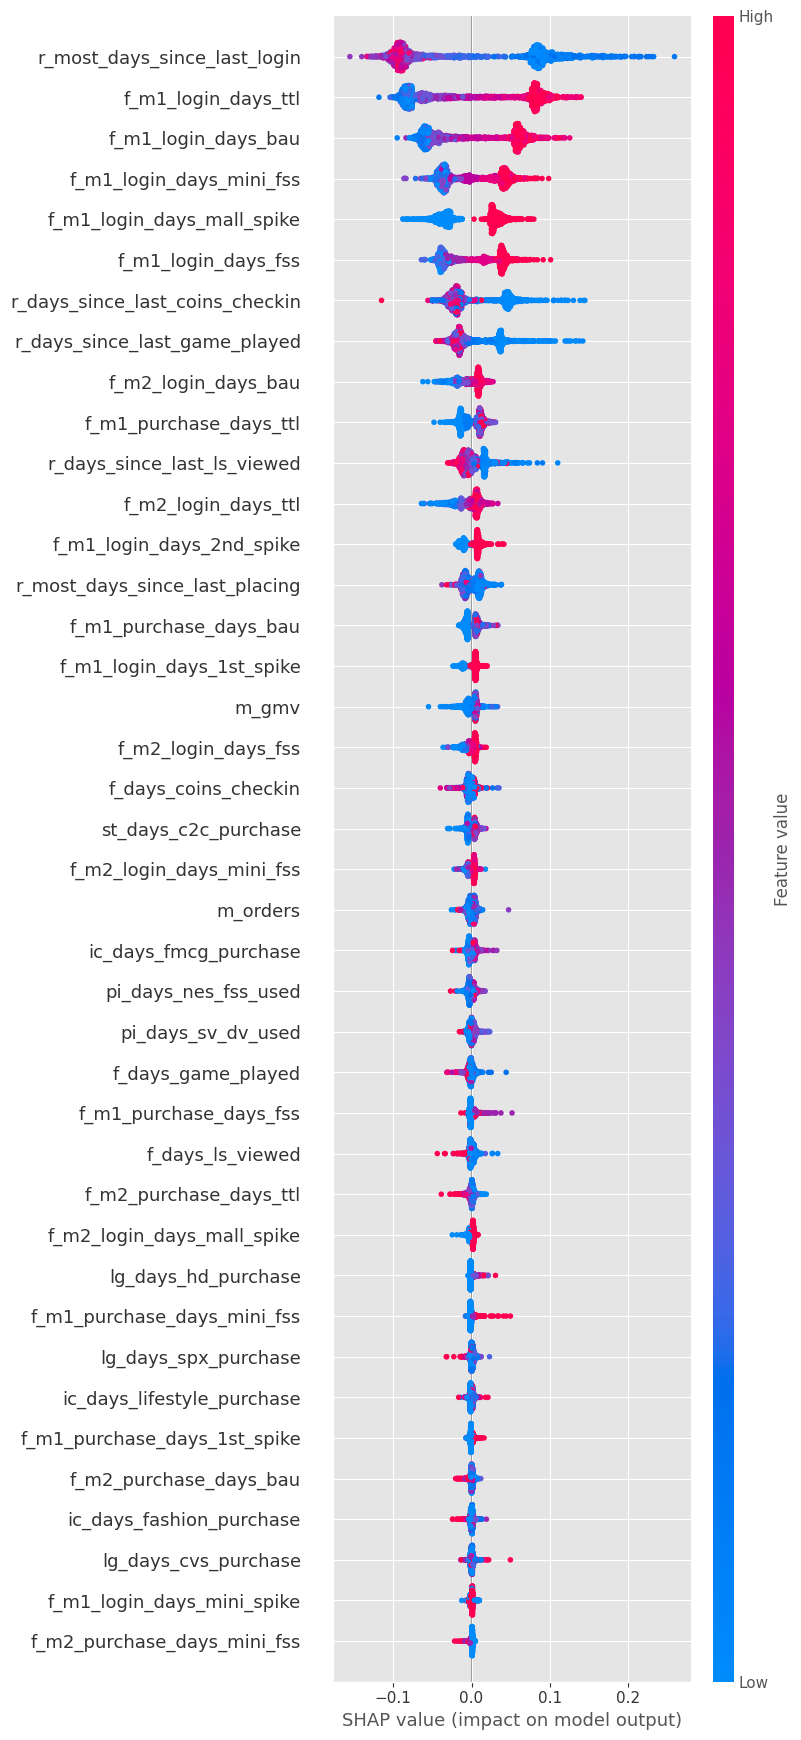

In [80]:
# 選取類別 'Yes' 的 SHAP 值 (第 3 個軸的索引 1)
shap_values_yes = shap_values[:, :, 1]

# 繪製 SHAP 條形圖
shap.summary_plot(
    shap_values_yes,       # 類別 'Yes' 的 SHAP 值
    X_train,               # 特徵數據
    # plot_type = "bar",       # 條形圖
    feature_names=X_train.columns.tolist(),
    max_display = 40
)

#### *Force Plot*

In [87]:
# 計算 SHAP 值
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_train)  # shap_values: (n_samples, n_features, n_classes)

# 檢查 SHAP 值的形狀
print(f"SHAP values shape: {shap_values.shape}")

# 提取類別 'Yes' 的 SHAP 值 (索引 1)
shap_values_yes = shap_values[:, :, 1]  # 提取類別 'Yes'，形狀 (n_samples, n_features)

# 選擇單一樣本的 SHAP 值 (例如第 0 個樣本)
sample_index = 2
sample = X_train.iloc[sample_index, :]          # 單一樣本的特徵值，形狀 (n_features,)
sample_shap_values = shap_values_yes[sample_index, :]  # 該樣本的 SHAP 值，形狀 (n_features,)

# 確保形狀一致
print("Single SHAP values shape:", sample_shap_values.shape)  # 應該是 (63,)
print("Single sample features shape:", sample.shape)          # 應該是 (63,)

# 初始化 SHAP 視覺化
shap.initjs()

# 繪製 Force Plot
shap.save_html(f'shap_force_plot_index{sample_index}.html',
               shap.force_plot(
                   base_value=explainer.expected_value[1],
                   shap_values=sample_shap_values,
                   features=sample,
                   feature_names=X_train.columns.tolist()
               ))

shap.force_plot(
    base_value=explainer.expected_value[1],  # 類別 'Yes' 的基準值
    shap_values=sample_shap_values,          # 該樣本的 SHAP 值 (一維長度 63)
    features=sample,                         # 該樣本的特徵值
    feature_names=X_train.columns.tolist()   # 特徵名稱
)

SHAP values shape: (1555, 63, 2)
Single SHAP values shape: (63,)
Single sample features shape: (63,)


#### *WaterFall Plot*

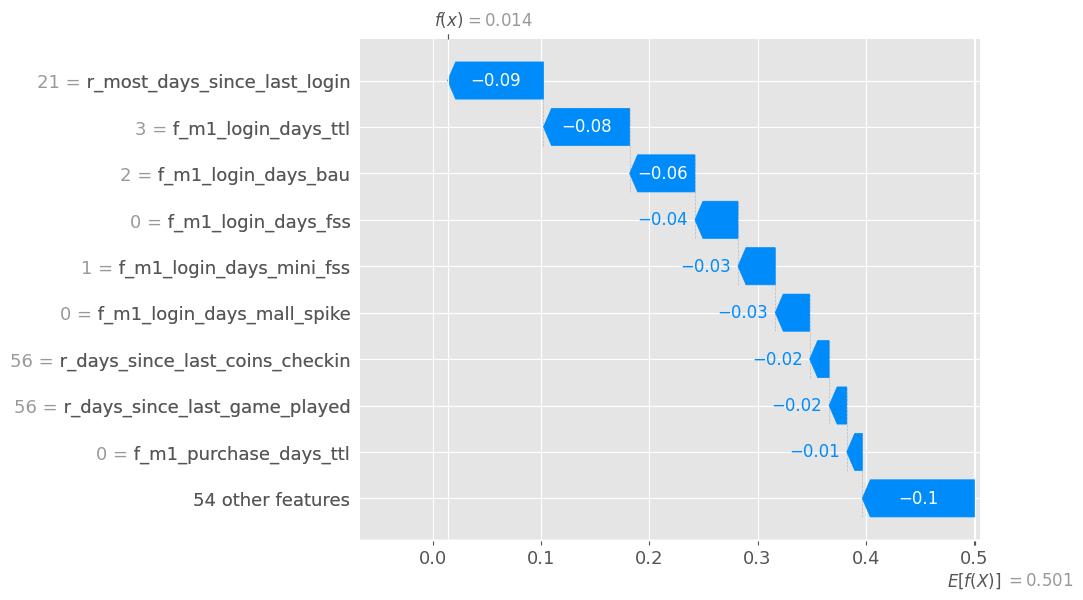

In [72]:
# 選取單一樣本（例如第 0 個樣本）
sample_index = 2
sample_shap_values = shap_values_yes[sample_index, :]  # SHAP 值 (n_features,)
sample_features = X_train.iloc[sample_index, :]        # 特徵值 (n_features,)

# 繪製 Waterfall Plot
shap.plots.waterfall(
    shap.Explanation(
        values=sample_shap_values,            # SHAP 值
        base_values=explainer.expected_value[1],  # 基準值 (類別 'Yes')
        data=sample_features,                 # 特徵值
        feature_names=X_train.columns.tolist()  # 特徵名稱
    )
)

#### *Decision Plot*

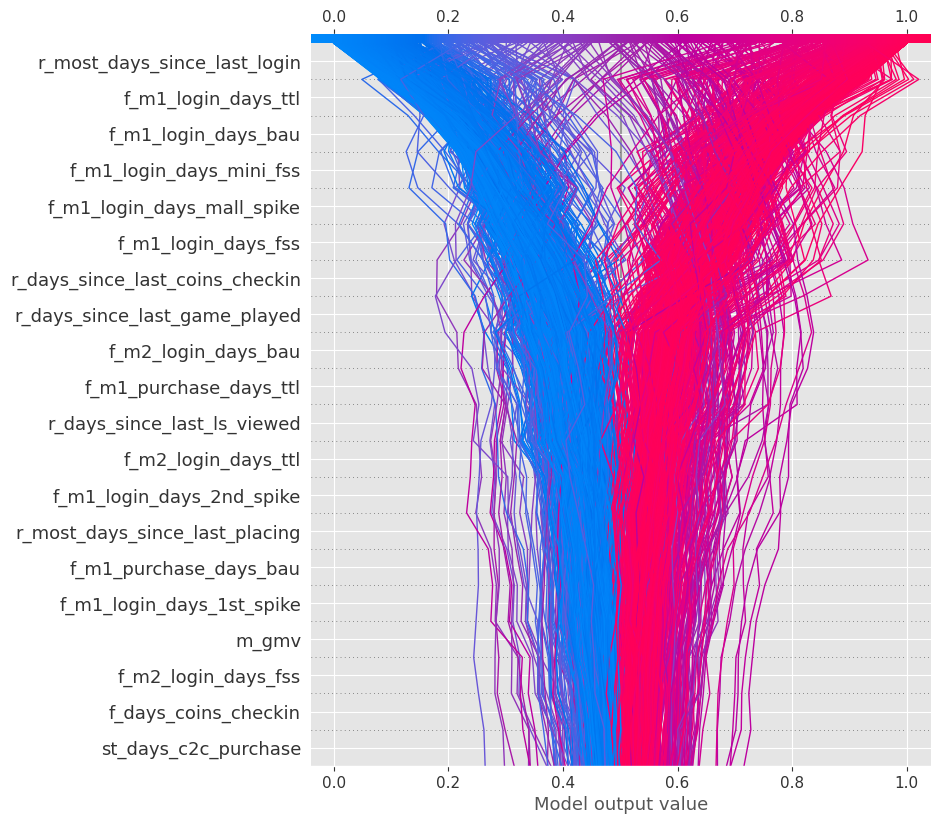

In [82]:
# # 選取單一樣本（例如第 0 個樣本）
# sample_index = 2
# sample_shap_values = shap_values_yes[sample_index, :]  # SHAP 值 (n_features,)
# sample_features = X_train.iloc[sample_index, :]        # 特徵值 (n_features,)

# 繪製 Decision Plot
shap.initjs()
shap.decision_plot(
    base_value=explainer.expected_value[1],  # 類別 'Yes' 的基準值
    shap_values=shap_values_yes,             # SHAP 值
    features=X_train,                        # 特徵矩陣
    feature_names=X_train.columns.tolist()   # 特徵名稱
)

In [ ]:
# 繪製 Decision Plot
shap.initjs()
shap.decision_plot(
    base_value=explainer.expected_value[1],  # 類別 'Yes' 的基準值
    shap_values=sample_shap_values,             # SHAP 值
    features=X_train,                        # 特徵矩陣
    feature_names=X_train.columns.tolist()   # 特徵名稱
)

In [73]:
X_train

r_least_days_since_last_login  r_most_days_since_last_login  \
513                               1                            15   
1393                              1                             3   
236                               1                            21   
1396                              1                             9   
416                               1                             2   
...                             ...                           ...   
138                               1                            24   
764                               1                             3   
1495                              1                            20   
1898                              1                            21   
1703                              1                             8   

      r_least_days_since_last_placing  r_most_days_since_last_placing  \
513                                 1                             335   
1393                                1                             100   
236                                 1                              52   
1396                                1                              20   
416                                 1                              12   
...                               ...                             ...   
138                                 3                              63   
764                                 1                              23   
1495                                1                              20   
1898                                1                              68   
1703                                1                              78   

      r_days_since_last_coins_checkin  r_days_since_last_game_played  \
513                                30                             30   
1393                               16                             29   
236                                56                             56   
1396                               35                             35   
416                                16                             16   
...                               ...                            ...   
138                                27                             27   
764                                20                             20   
1495                               16                             19   
1898                               20                             20   
1703                               17                             25   

      r_days_since_last_ls_viewed  f_m2_login_days_ttl  \
513                            35                    7   
1393                           52                   31   
236                            67                   14   
1396                           35                   19   
416                            31                   30   
...                           ...                  ...   
138                            27                    3   
764                            20                   23   
1495                           16                   27   
1898                           20                   17   
1703                           21                   10   

      f_m2_login_days_1st_spike  f_m2_login_days_2nd_spike  ...  \
513                           0                          1  ...   
1393                          1                          1  ...   
236                           1                          1  ...   
1396                          0                          1  ...   
416                           1                          1  ...   
...                         ...                        ...  ...   
138                           0                          0  ...   
764                           1                          0  ...   
1495                          1                          1  ...   
1898                          1                          0  ...   
1

In [79]:
sample_df[1393:]

userid  is_login_on_dec  is_puchased_on_dec  \
1393   162648529                1                   0   
1394     8859599                1                   1   
1395   178896251                1                   1   
1396   523129178                1                   1   
1397     9455467                1                   1   
...          ...              ...                 ...   
1939  1311232225                0                   0   
1940     5366323                0                   0   
1941  1007832348                1                   0   
1942    62869620                0                   0   
1943   106109369                0                   0   

      purchase_more_than_one_on_dec  r_least_days_since_last_login  \
1393                              0                              1   
1394                              0                              1   
1395                              0                              1   
1396                              1                              1   
1397                              0                              1   
...                             ...                            ...   
1939                              0                              1   
1940                              0                              1   
1941                              0                              1   
1942                              0                              1   
1943                              0                              1   

      r_most_days_since_last_login  r_least_days_since_last_placing  \
1393                             3                                1   
1394                             1                                1   
1395                            12                                1   
1396                             9                                1   
1397                             7                                1   
...                            ...                              ...   
1939                             6                                1   
1940                            11                                1   
1941                             3                                1   
1942                            18                                1   
1943                            32                                1   

      r_most_days_since_last_placing  r_days_since_last_coins_checkin  \
1393                             100                               16   
1394                              15                               16   
1395                              40                               61   
1396                              20                               35   
1397                              51                               17   
...                              ...                              ...   
1939                              19                               21   
1940                              20                               30   
1941                             199                               35   
1942                             365                               43   
1943                              56                               23   

      r_days_since_last_game_played  ...  lg_days_cvs_purchase  \
1393                             29  ...                     2   
1394                             16  ...                     4   
1395                             61  ...                     2   
1396                             35  ...                     6   
1397                             17  ...                     3   
...                             ...  ...                   ...   
1939                             23  ...                     6   
1940                             30  ...                     0   
1941                             35  ...                     0   
1942                             43  ...                     0   
1943                        

### *Tree Visualization*

In [84]:
feature_names = X_train.columns.tolist()
target_names = ['No', 'Yes']
# tree_model = best_rf.estimators_[1]

super_tree = SuperTree(
    best_rf,  # The best tree model
    X_train,  # Feature data used for training
    y_train,  # Target data used for training
    feature_names,  # Feature names as a list
    target_names = target_names,
    )

# Show the best tree
super_tree.show_tree()